# linear regression(线性回归)

* 注意：python版本为3.8

## 参考

* 视频：[地址](https://study.163.com/course/courseLearn.htm?courseId=1004570029#/learn/video?lessonId=1049052745&courseId=1004570029)

## 导入模块

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

sns.set(context='notebook', style='whitegrid', palette='dark')
%matplotlib inline

## 一些函数

1. 读取X,y函数`func_get_X_y()`
2. 读取y函数`func_get_y()`
3. 归一化函数`func_normalize_X()`

In [2]:
def func_get_X_y(df):
    """
    得到X,y
    :param df: A dataframe
    :return X: ndarray matrix
    :return y: target
    """
    X = df.iloc[:, :-1].values
    y = np.array(df.iloc[:, -1])
    return X.T, np.expand_dims(y, axis=0)

In [3]:
def func_normalize_X(X):
    """
    normalize X
    :param X: ndarray matrix
    :return X_norm: norm ndarray matrix
    """
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_std = np.std(X, axis=1, keepdims=True)
    X_norm = (X - X_mean) / X_std
    return X_norm

## DNN实现linear regression

### 步骤

1. 初始化参数
2. forward step
3. 计算损失
4. backward step
5. 更新参数
6. 将1-5步集合到一起
7. predict

### 初始化参数

In [4]:
def func_initial_parameters(X):
    """
    初始化参数
    :param X: input vector
    :return params
    """
    n_x = X.shape[0]
    
    w = np.zeros((n_x, 1))
    b = np.zeros((1, 1))
    
    params = {
        'w': w,
        'b': b
    }
    return params

### forward step

$$
z = w*x+b
$$

In [5]:
def func_forward_propagation(parameters, X):
    """
    forward step
    :param parameters:
    :param X: input vector
    :return z: output vector
    """
    w = parameters['w']
    b = parameters['b']
    z = np.dot(w.T, X) + b
    return z

### compute cost

* cost公式

    $$
    cost = \frac{1}{2m}(z-y)^2
    $$

In [6]:
def func_compute_cost(z, y):
    """
    计算损失
    :param z: output vector
    :param y: true label
    :return cost: cost
    """
    m = y.shape[1]
    
    cost = 1 / (2 * m) * np.sum(np.power(z-y, 2))
    cost = cost.squeeze()
    return cost

### backward step

* 梯度公式

    $$
    dw = 1/m * X^T(z-y)  \\
    db = 1/m * (z-y)
    $$

In [7]:
def func_backward_propagation(parameters, z, X, y):
    """
    计算梯度
    :param parameters:
    :param X:
    :param y:
    :param z:
    :return grads:
    """
    
    m = X.shape[1]
    
    dw = 1 / m * np.dot(X, (z-y).T)
    db = 1 / m * np.sum(z - y, axis=1, keepdims=True)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads

### 更新参数

* 公式

    $$
    \theta = \theta - \alpha * d\theta
    $$

In [8]:
def func_update_parameters(parameters, grads, lr):
    """
    更新参数
    :param parameters:
    :param grads:
    :param lr:
    :return parameters:
    """
    w = parameters['w']
    b = parameters['b']
    
    dw = grads['dw']
    db = grads['db']
    
    w = w - lr * dw
    b = b - lr * db
    
    parameters = {
        'w': w,
        'b': b
    }
    return parameters

### 整合到模型

In [9]:
def func_linear_model(X, y, num_epochs=10000, lr=0.01, print_cost=False):
    """
    神经网络实现linear model
    :param X:
    :param y:
    :param num_epochs:
    :param lr:
    :param print_cost:
    :return parameters
    """
    parameters = func_initial_parameters(X)
    cost_list = []
    for i in range(num_epochs):
        z = func_forward_propagation(parameters, X)
        cost = func_compute_cost(z, y)
        cost_list.append(cost)
        grads = func_backward_propagation(parameters, z, X, y)
        parameters = func_update_parameters(parameters, grads, lr)
        
        if i % 1000 == 0 and print_cost:
            print('cost after %i epoch: %f' % (i, cost))
    
    return parameters, cost_list

## 单变量线性回归

### 导入数据

In [10]:
root_path = './机器学习之吴恩达作业1/'

In [11]:
ex1data1_path = root_path + 'ex1data1.txt'

In [12]:
df = pd.read_csv(ex1data1_path, names=['population', 'profit'])

### 数据eda

In [13]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [15]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


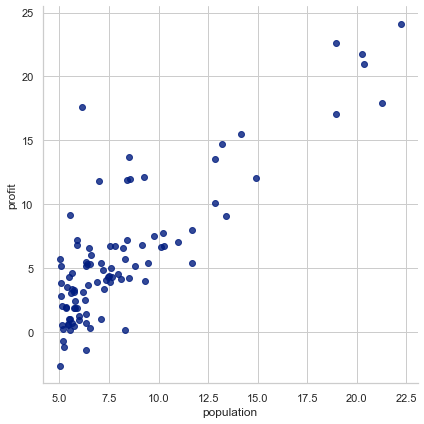

In [16]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)
plt.show()

In [17]:
X, y = func_get_X_y(df)

In [18]:
X.shape

(1, 97)

In [19]:
y.shape

(1, 97)

In [20]:
np.mean(X, axis=1, keepdims=True)

array([[8.1598]])

In [21]:
np.std(X, axis=1, keepdims=True)

array([[3.849884]])

In [22]:
X_norm = func_normalize_X(X)

In [23]:
np.mean(X_norm, axis=1, keepdims=True)

array([[3.1933219e-16]])

In [24]:
np.std(X_norm, axis=1, keepdims=True)

array([[1.]])

### dnn函数测试

In [25]:
parameters = func_initial_parameters(X_norm)

In [26]:
for key, value in parameters.items():
    print(key, value)
    print(value.shape)

w [[0.]]
(1, 1)
b [[0.]]
(1, 1)


In [27]:
z = func_forward_propagation(parameters, X_norm)

In [28]:
z.shape

(1, 97)

In [29]:
cost = func_compute_cost(z, y)

In [30]:
cost

32.072733877455676

In [31]:
grads = func_backward_propagation(parameters, z, X, y)

In [32]:
grads

{'dw': array([[-65.32884975]]), 'db': array([[-5.83913505]])}

In [33]:
parameters = func_update_parameters(parameters, grads, lr=0.01)

In [34]:
parameters

{'w': array([[0.6532885]]), 'b': array([[0.05839135]])}

### 自定义DNN

In [35]:
parameters, cost_list = func_linear_model(X, y, print_cost=True)

cost after 0 epoch: 32.072734
cost after 1000 epoch: 4.515956
cost after 2000 epoch: 4.478028
cost after 3000 epoch: 4.477000
cost after 4000 epoch: 4.476972
cost after 5000 epoch: 4.476971
cost after 6000 epoch: 4.476971
cost after 7000 epoch: 4.476971
cost after 8000 epoch: 4.476971
cost after 9000 epoch: 4.476971


In [36]:
parameters

{'w': array([[1.19303364]]), 'b': array([[-3.89578082]])}

In [37]:
# cost_list

### 可视化

In [38]:
w = parameters['w'].squeeze()
b = parameters['b'].squeeze()

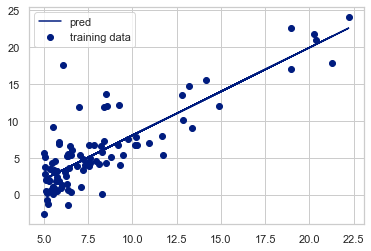

In [39]:
plt.scatter(X, y, label='training data')
plt.plot(X.squeeze(), (w*X+b).squeeze(), label='pred')
plt.legend(loc=2)
plt.show()

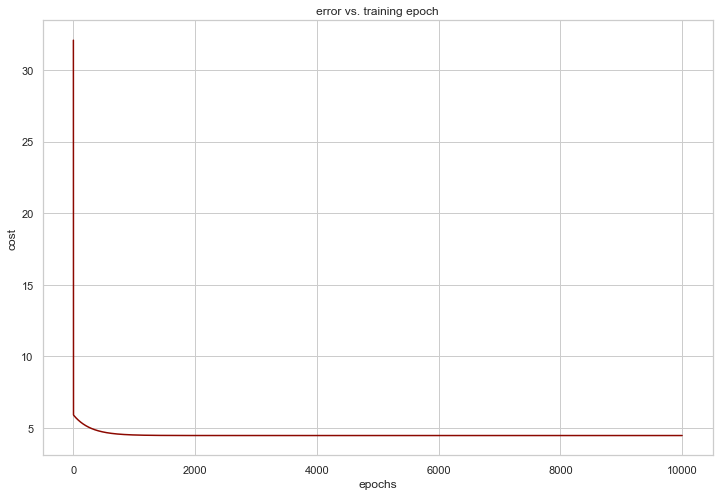

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(cost_list)), cost_list, 'r')
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')
plt.show()

### sklearn

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X.T, y.squeeze())

LinearRegression()

In [43]:
lr.coef_

array([1.19303364])

In [44]:
lr.intercept_

-3.8957808783118484

## 多变量线性回归

### 导入数据

In [45]:
ex1data2_path = root_path + 'ex1data2.txt'

In [46]:
df2 = pd.read_csv(ex1data2_path, header=None, names=['size', 'bedrooms', 'price'])

### 数据eda

In [47]:
df2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [48]:
df2_norm = (df2 - df2.mean()) / df2.std()

In [49]:
df2_norm.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [50]:
X, y = func_get_X_y(df2_norm)

In [51]:
X.shape

(2, 47)

In [52]:
y.shape

(1, 47)

### 自定义DNN

In [53]:
parameters, cost_list = func_linear_model(X, y, print_cost=True)

cost after 0 epoch: 0.489362
cost after 1000 epoch: 0.130703
cost after 2000 epoch: 0.130686
cost after 3000 epoch: 0.130686
cost after 4000 epoch: 0.130686
cost after 5000 epoch: 0.130686
cost after 6000 epoch: 0.130686
cost after 7000 epoch: 0.130686
cost after 8000 epoch: 0.130686
cost after 9000 epoch: 0.130686


In [54]:
parameters

{'w': array([[ 0.88476599],
        [-0.05317882]]),
 'b': array([[-1.11034113e-16]])}

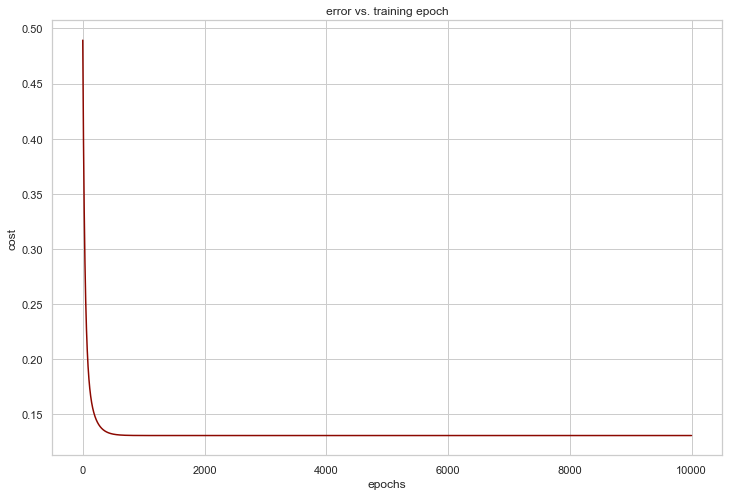

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(cost_list)), cost_list, 'r')
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')
plt.show()

### sklearn

In [56]:
lr = LinearRegression()
lr.fit(X.T, y.squeeze())

LinearRegression()

In [57]:
lr.coef_

array([ 0.88476599, -0.05317882])

In [58]:
lr.intercept_

-1.1568575416727595e-16

## TF2实现线性回归

### 参考

* [地址](https://huhuhang.com/post/machine-learning/tensorflow-2-0-02)

### 低阶API实现

In [59]:
X.shape

(2, 47)

In [60]:
y.shape

(1, 47)

In [61]:
import tensorflow as tf
tf.random.set_seed(2030)

In [62]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

2021-09-07 23:40:36.093565: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
X

<tf.Tensor: shape=(2, 47), dtype=float32, numpy=
array([[ 1.3000987e-01, -5.0418985e-01,  5.0247633e-01, -7.3572308e-01,
         1.2574760e+00, -1.9731728e-02, -5.8723980e-01, -7.2188139e-01,
        -7.8102303e-01, -6.3757312e-01, -7.6356702e-02, -8.5673720e-04,
        -1.3927335e-01,  3.1172919e+00, -9.2195630e-01,  3.7664309e-01,
        -8.5652304e-01, -9.6222293e-01,  7.6546788e-01,  1.2964844e+00,
        -2.9404828e-01, -1.4179000e-01, -4.9915650e-01, -4.8673380e-02,
         2.3773921e+00, -1.1333562e+00, -6.8287307e-01,  6.6102630e-01,
         2.5080982e-01,  8.0070120e-01, -2.0344831e-01, -1.2591895e+00,
         4.9476571e-02,  1.4298676e+00, -2.3868163e-01, -7.0929807e-01,
        -9.5844793e-01,  1.6524319e-01,  2.7863503e+00,  2.0299317e-01,
        -4.2365655e-01,  2.9862645e-01,  7.1261793e-01, -1.0075229e+00,
        -1.4454228e+00, -1.8708998e-01, -1.0037479e+00],
       [-2.2367519e-01, -2.2367519e-01, -2.2367519e-01, -1.5377669e+00,
         1.0904166e+00,  1.090

In [64]:
y

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.47574687, -0.08407444,  0.22862574, -0.86702454,  1.5953895 ,
        -0.32399786, -0.20403615, -1.1309483 , -1.0269735 , -0.7830513 ,
        -0.80305296,  0.05268191, -0.08328269,  2.874981  , -0.64389575,
         0.87561923, -0.32399786, -1.1237426 ,  1.2762754 ,  2.0680387 ,
        -0.69987786, -0.68308324, -0.77985233, -0.64389575,  1.8673027 ,
        -0.7238702 ,  0.99238193,  1.0283705 ,  1.0763551 , -0.32399786,
         0.07587451, -1.363666  , -0.20403615,  1.9152874 , -0.4359621 ,
        -0.7238702 , -0.88381916,  0.03668701,  1.6681663 , -0.4271649 ,
         0.22462702, -0.08407444, -0.21123385, -0.33119556, -1.2836915 ,
        -0.32399786, -0.8070437 ]], dtype=float32)>

#### 定义模型类

In [65]:
class Model(object):
    def __init__(self, n_x, n_y):
        tf.random.set_seed(2030)
        self.w = tf.Variable(tf.random.uniform(shape=(n_y, n_x)))
        self.b = tf.Variable(tf.random.uniform(shape=(n_y, 1)))
    
    def __call__(self, X):
#         z = np.dot(tf.transpose(self.w), X) + self.b
        z = tf.matmul(self.w, X) + self.b
        return z

In [66]:
n_x, n_y = X.shape[0], 1

In [67]:
model = Model(n_x, n_y)

In [68]:
z = model(X)

In [69]:
z

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.26395318,  0.22815093,  0.28497988, -0.08861065,  0.6312926 ,
         0.5591908 ,  0.22346255,  0.21586168,  0.21252298,  0.22062111,
         0.5559942 ,  0.25656542,  0.24875143,  1.0399749 ,  0.20456693,
         0.5815672 , -0.09543014,  0.20229377,  0.6035174 ,  0.6334947 ,
         0.24001399, -0.05508158,  0.22843508,  0.557557  ,  0.3908238 ,
         0.19263284,  0.2180638 ,  0.29393047,  0.27077267,  0.30181548,
        -0.05856234, -0.42185265,  0.56309783,  0.33733356,  0.54683053,
         0.21657205,  0.20250687,  0.5696331 ,  0.71760154,  0.57176423,
        -0.07099366,  0.27347204,  0.6005339 ,  0.19973646, -0.12867507,
         0.549743  ,  0.19994956]], dtype=float32)>

#### 损失函数

$$
mse = loss = \frac{1}{2m}(z-y)(z-y)^T
$$

In [70]:
def func_loss_linear_regression(model, X, y):
    """
    计算mse
    :param model: tf model
    :param X:
    :param y:
    :return loss
    """
#     n_x = X.shape[0]
#     n_y = y.shape[0]
    m = X.shape[1]
    z = model(X)
    loss = tf.reduce_mean(tf.square(z-y))  # Computes the mean of elements across dimensions of a tensor
#     loss = 1 / (2*m) * tf.matmul(z-y, tf.transpose(z-y))
    return loss

In [71]:
mse_loss = func_loss_linear_regression(model, X, y)

In [72]:
mse_loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.84892213>

#### update parameters

In [73]:
epochs = 10000
lr = 0.01

In [74]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:  # 追踪梯度
        loss = func_loss_linear_regression(model, X, y)
        dw, db = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(lr*dw)
    model.b.assign_sub(lr*db)

    if epoch % 1000 == 0:
        print('epoch [{}/{}], loss {:.3f}'.format(epoch, epochs, loss))

epoch [0/10000], loss 0.849
epoch [1000/10000], loss 0.261
epoch [2000/10000], loss 0.261
epoch [3000/10000], loss 0.261
epoch [4000/10000], loss 0.261
epoch [5000/10000], loss 0.261
epoch [6000/10000], loss 0.261
epoch [7000/10000], loss 0.261
epoch [8000/10000], loss 0.261
epoch [9000/10000], loss 0.261


In [75]:
model.w

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.8847637 , -0.05317748]], dtype=float32)>

In [76]:
model.b

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.1218328e-08]], dtype=float32)>

In [77]:
y_hat = model(X)

In [78]:
y_hat

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.12692249, -0.4341944 ,  0.45646733, -0.56916654,  1.0545835 ,
        -0.07544354, -0.507674  , -0.6268    , -0.6791264 , -0.5522071 ,
        -0.12554325,  0.01113646, -0.11132954,  2.630201  , -0.803819  ,
         0.27525455, -0.6760459 , -0.8394455 ,  0.6192726 ,  1.0890968 ,
        -0.24826878, -0.0436761 , -0.42974108, -0.10105006,  2.1153247 ,
        -0.99085796, -0.5922868 ,  0.59674656,  0.23380189,  0.7203258 ,
        -0.09822914, -0.96243054, -0.01421054,  1.2769895 , -0.26916245,
        -0.61566675, -0.83610547,  0.08821556,  2.4072762 ,  0.12161537,
        -0.29306138,  0.27610835,  0.57251287, -0.8795253 , -1.197083  ,
        -0.22351605, -0.8761853 ]], dtype=float32)>

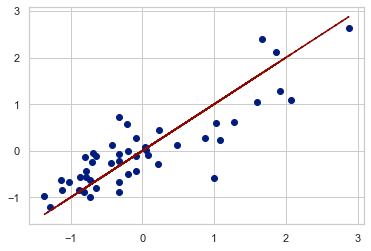

In [79]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

### 高阶API实现

* `tf.keras`模块下提供的全连接层实际上就是一个线性计算过程

In [80]:
X = tf.transpose(X)
y = tf.transpose(y)

In [81]:
X.shape

TensorShape([47, 2])

In [82]:
y.shape

TensorShape([47, 1])

#### 构建模型

In [83]:
model = tf.keras.layers.Dense(units=1)

In [84]:
y_hat = model(X)

In [85]:
y_hat.shape

TensorShape([47, 1])

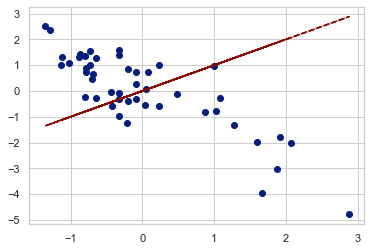

In [86]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

In [87]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.2987416 ],
        [-0.30637085]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [88]:
y.shape

TensorShape([47, 1])

In [89]:
y_hat.shape

TensorShape([47, 1])

In [90]:
tf.reshape(y_hat, (1, -1))

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[-0.10032167,  0.7233399 , -0.58405936,  1.4266411 , -1.9672081 ,
        -0.30844542,  0.8312003 ,  1.0060649 ,  1.0828747 ,  0.8965703 ,
        -0.23490423,  0.06964023,  0.24940765, -4.7852283 ,  1.2659105 ,
        -0.8232339 ,  1.583529  ,  1.3182065 , -1.3282168 , -2.01787   ,
         0.4504203 ,  0.6552755 ,  0.7168029 , -0.2708577 , -3.0190904 ,
         1.5404644 ,  0.9554032 , -0.78997475, -0.2572096 , -0.9713764 ,
         0.73535377,  2.509088  , -0.39832914, -1.7885009 , -0.02408609,
         0.9897225 ,  1.3133037 , -0.54868007, -3.9528208 , -0.5977075 ,
         1.0213473 , -0.31931105, -1.2595783 ,  1.3770396 ,  2.3483577 ,
        -0.09109031,  1.3721367 ]], dtype=float32)>

In [91]:
tf.keras.losses.mean_squared_error(tf.transpose(y), tf.transpose(y_hat))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.596359], dtype=float32)>

#### 更新模型

In [92]:
epochs = 10000
lr = 0.01
# model = tf.keras.layers.Dense(units=1)

In [93]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_hat = model(X)
        loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(tf.transpose(y), tf.transpose(y_hat)))
    grads = tape.gradient(loss, model.variables)
    optimizer = tf.keras.optimizers.SGD(lr)
    optimizer.apply_gradients(zip(grads, model.variables))

    if epoch % 1000 == 0:
        print('epoch [{}/{}], loss {:.3f}'.format(epoch, epochs, loss))

epoch [0/10000], loss 5.596
epoch [1000/10000], loss 0.261
epoch [2000/10000], loss 0.261
epoch [3000/10000], loss 0.261
epoch [4000/10000], loss 0.261
epoch [5000/10000], loss 0.261
epoch [6000/10000], loss 0.261
epoch [7000/10000], loss 0.261
epoch [8000/10000], loss 0.261
epoch [9000/10000], loss 0.261


In [94]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.8847637 ],
        [-0.05317745]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.490894e-08], dtype=float32)>]

In [95]:
y_hat = model(X)

In [96]:
y_hat.shape

TensorShape([47, 1])

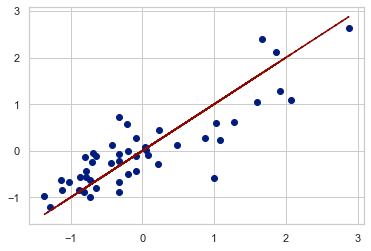

In [97]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

### keras方式实现

* 高阶API并不精简，这里使用tensorflow keras API来实现

In [98]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[X.shape[1]]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='sgd', loss='mse')

In [100]:
class PrintEpochs(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1000 == 0:
            print('epoch: {}, logs: {}'.format(epoch, logs))

In [101]:
model.fit(X, y, epochs=10000, verbose=0, callbacks=[PrintEpochs()])

2021-09-07 23:41:19.635042: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


epoch: 0, logs: {'loss': 0.6870020031929016}
epoch: 1000, logs: {'loss': 0.26153504848480225}
epoch: 2000, logs: {'loss': 0.26175591349601746}
epoch: 3000, logs: {'loss': 0.2618563175201416}
epoch: 4000, logs: {'loss': 0.26148030161857605}
epoch: 5000, logs: {'loss': 0.26158812642097473}
epoch: 6000, logs: {'loss': 0.26160359382629395}
epoch: 7000, logs: {'loss': 0.2616385519504547}
epoch: 8000, logs: {'loss': 0.26146188378334045}
epoch: 9000, logs: {'loss': 0.2615436911582947}


In [102]:
y_hat = model(X)

In [103]:
y_hat.shape

TensorShape([47, 1])

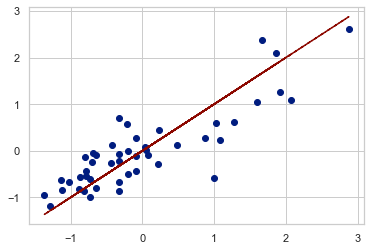

In [104]:
plt.scatter(tf.transpose(y), y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

In [105]:
model.get_weights()

[array([[ 0.8758631 ],
        [-0.05261532]], dtype=float32),
 array([0.00111299], dtype=float32)]

### TF官网回归例子

* [参考链接](https://www.tensorflow.org/tutorials/keras/regression)

* 简要
    1. 使用经典[Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg)数据集
    2. 构建一个预测70年代末到80年代初汽车燃油效率的模型
    3. 使用`tf.keras`API

#### 导入模块

In [106]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


#### 导入数据集

In [107]:
dataset_path = keras.utils.get_file(fname="auto-mpg.data", 
                                    origin="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                                    cache_dir='./机器学习之吴恩达作业1/')
dataset_path

'./机器学习之吴恩达作业1/datasets/auto-mpg.data'

In [108]:
columns_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                 'Weight', 'Acceleration', 'ModelYear', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=columns_names, na_values='?',
                          comment='\t', sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()

In [109]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#### 数据清洗

In [110]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [111]:
dataset.dropna(inplace=True)

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   ModelYear     392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [113]:
# 将origin进行onehot
origin = dataset.pop('Origin')

In [114]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

In [115]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


#### 划分训练集、测试集

In [116]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [117]:
train_dataset.shape, test_dataset.shape

((314, 10), (78, 10))

#### 数据检查

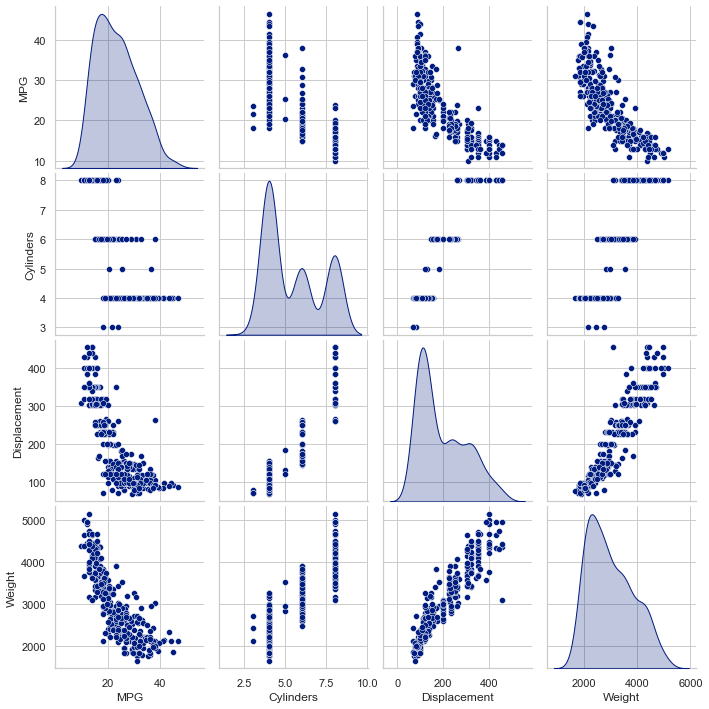

In [118]:
# 数据联合分布
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind='kde')

In [119]:
# 数据总体统计
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
ModelYear,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


#### 分离特征和target

In [120]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

#### 数据标准化

In [121]:
normed_train_data = (train_dataset - train_dataset.mean()) / train_dataset.std()
normed_test_data = (test_dataset - train_dataset.mean()) / train_dataset.std()

#### 模型

##### 构建模型

In [122]:
def func_build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [123]:
model = func_build_model()

##### 检查模型

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [125]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.4894033 ],
       [0.2915542 ],
       [0.02622074],
       [0.20493463],
       [0.4046716 ],
       [0.2944433 ],
       [0.4748975 ],
       [0.7831887 ],
       [0.28179386],
       [0.55701965]], dtype=float32)

##### 训练模型

* 对模型进行1000个周期的训练

In [126]:
class PrintEpochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('epoch: {}, logs: {}'.format(epoch, logs))

In [127]:
epochs = 1000

In [128]:
history = model.fit(
    normed_train_data, train_labels, 
    epochs=epochs, validation_split=0.2, verbose=0, 
    callbacks=[PrintEpochs()])

epoch: 0, logs: {'loss': 552.3905639648438, 'mae': 22.274259567260742, 'mse': 552.3905639648438, 'val_loss': 539.4788208007812, 'val_mae': 21.9625301361084, 'val_mse': 539.4788208007812}
epoch: 100, logs: {'loss': 6.219203472137451, 'mae': 1.741994857788086, 'mse': 6.219203472137451, 'val_loss': 8.529964447021484, 'val_mae': 2.2209670543670654, 'val_mse': 8.529964447021484}
epoch: 200, logs: {'loss': 5.566501617431641, 'mae': 1.6070328950881958, 'mse': 5.566501617431641, 'val_loss': 9.027262687683105, 'val_mae': 2.2147090435028076, 'val_mse': 9.027262687683105}
epoch: 300, logs: {'loss': 4.821636199951172, 'mae': 1.5219510793685913, 'mse': 4.821636199951172, 'val_loss': 9.217964172363281, 'val_mae': 2.3883771896362305, 'val_mse': 9.217964172363281}
epoch: 400, logs: {'loss': 4.370648384094238, 'mae': 1.4500079154968262, 'mse': 4.370648384094238, 'val_loss': 9.613961219787598, 'val_mae': 2.407794713973999, 'val_mse': 9.613961219787598}
epoch: 500, logs: {'loss': 3.9961860179901123, 'mae

使用`history`对象中存储的统计信息可视化模型的训练进度

In [129]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.669586,1.113412,2.669586,10.422947,2.453421,10.422947,995
996,2.603099,1.050171,2.603099,9.832856,2.338202,9.832856,996
997,2.733811,1.114683,2.733811,11.410033,2.464207,11.410033,997
998,2.663424,1.095967,2.663424,9.941391,2.390267,9.941391,998
999,2.556182,1.059770,2.556182,10.403207,2.391733,10.403207,999


In [130]:
def func_plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('mean abs error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='train error')
    plt.plot(hist['epoch'], hist['val_mae'], label='val error')
    plt.ylim([0, 5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('mean square error [MPG]')
    plt.plot(hist['epoch'], hist['mse'], label='train error')
    plt.plot(hist['epoch'], hist['val_mse'], label='val error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()

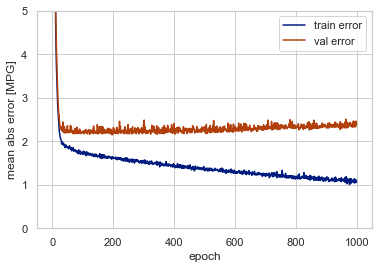

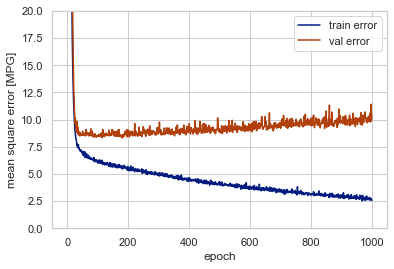

In [131]:
func_plot_history(history)

* 该图表显示在约100个周期后误差非但没有改进，反而出现恶化
* 更新`model.fit`调用，当验证集没有提高时自动停止训练
* 使用`keras.callbacks.EarlyStopping()`实现

In [132]:
model = func_build_model()

In [133]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [134]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    normed_train_data, train_labels, 
    epochs=epochs, validation_split=0.2, verbose=0,
    callbacks=[early_stop, PrintEpochs()])

epoch: 0, logs: {'loss': 562.9177856445312, 'mae': 22.478023529052734, 'mse': 562.9177856445312, 'val_loss': 543.6301879882812, 'val_mae': 22.027149200439453, 'val_mse': 543.6302490234375}


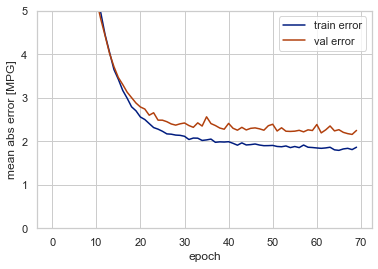

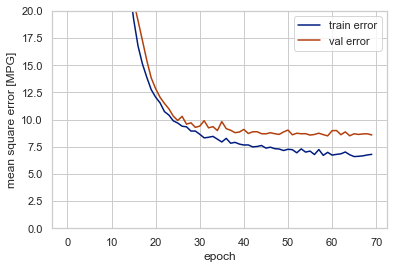

In [135]:
func_plot_history(history)

#### 预测

In [136]:
test_pred = model.predict(normed_test_data).flatten()

In [137]:
test_pred.shape, test_labels.shape

((78,), (78,))

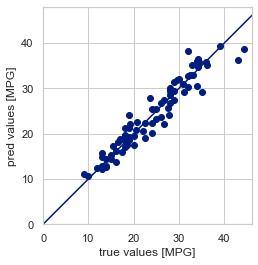

In [138]:
plt.scatter(test_labels, test_pred)
plt.xlabel('true values [MPG]')
plt.ylabel('pred values [MPG]')
plt.axis('equal')  # Set equal scaling
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

* 看起来模型还不错，预测还可以
* 接下来看看误差分布

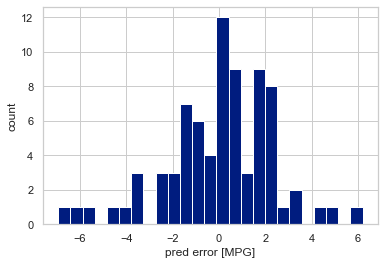

In [139]:
error = test_pred - test_labels
plt.hist(error, bins=25)
plt.xlabel('pred error [MPG]')
_ = plt.ylabel('count')

误差分布不是完全的高斯分布，但是可以推断出，是因为样本量很小导致的

#### 结论

1. `mse`是用于回归问题的常见损失函数
2. `mae`是常见的回归评估指标
3. 当输入数据特征值存在不同范围时，每个特征应独立缩放到相同范围
4. 如果训练数据不多，一种方法是选择隐藏层较小的小网络，以避免过拟合
5. early stopping是一种防止过拟合的有效技术